- Fonte: [https://projecteuler.net/problem=3](https://projecteuler.net/problem=3)

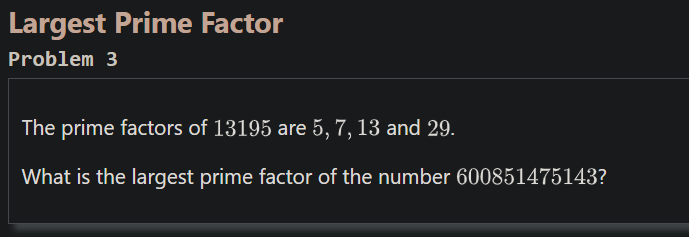

In [1]:
import numpy as np
from math import sqrt

In [2]:
number = 600_851_475_143
print (number, sqrt(number))

600851475143 775146.0992245268


# Testes

In [3]:
count = 0
numero = 543
print (f'inteiro próximo da raiz de {numero} = {int(sqrt(numero))}')
passou_da_raiz = False
for divisor in range(1, numero+1):
    if (numero % divisor == 0):
        dividendo = numero // divisor
        print (f'[{count}]: {divisor} * {dividendo}', end='')
        count += 1
        if (divisor >= sqrt(numero) and not(passou_da_raiz)):
            passou_da_raiz = True
            print ('<<<====')
        else:
            print ('')


inteiro próximo da raiz de 543 = 23
[0]: 1 * 543
[1]: 3 * 181
[2]: 181 * 3<<<====
[3]: 543 * 1


# Proposta

1º) Vou criar uma lista de números primos.  
2º) Vou criar a decomposição de qualquer número inteiro em números primos.  
3º) Fazer a decomposição do número proposto: 600851475143 em números primos e encontrar seu maior número primo.  

# Criar números primos

- A definição nos diz que um número é primo quando é divisível somente por 1 e por ele mesmo.  
- O problema é que para números grandes a lógica começa a ficar demorada, de dividir um número por todas as possibilidades.  
- Assim, podemos reduzir a busca de divisores fazendo:
    - Olhando somente os números ímpares, pois somente 2 é o único par divisível por 1 e ele mesmo, ou seja, o único primo par.
    - Para olhar todos os divisores, podemos correr de 3 até int(sqrt(numero)), ou seja, vamos supor que existe um número N que não é primo, logo podemos dizer que ele é o produto N = a x b, sendo que para cada divisor a, existe um b tal que eles são pares. Se o número é divisível por a e tem como inteiro um b, então N também é divisível por b e terá como um inteiro um a.
    Sendo assim, podemos concluir que tanto a, quanto b são menores que sqrt(N), pois se ambos são maiores que sqrt(N), então o produto seria maior que N, que não é o caso. 
- Criamos a lógica para saber se um número N é primo como:
    - Fazemos um loop (variável d) correr de 1 até int(sqrt(N)):
        - Se N % d == 0 (se N for divisível por d) então contabiliza +1 na variável count (contador)
        - Se count >=2 então esse N tem além de 1, outro valor antes de sqrt(N) e também vai ter o seu par depois de sqrt(N). Ou seja, esse número não é mais primo. Pode fazer um break nesse loop.
        - Se no final só tiver count=1, então vai ter depois de sqrt(N) somente o próprio número N, ou seja, é primo

In [6]:
def e_primo(n):
    d = 1
    count = 0
    while (d < 1+int(sqrt(n))):
        count += 1 if (n % d == 0) else 0
        if (count >= 2): break
        d += 1

    return count == 1

primos = [2]
for n in range(3, 1_000_000, 2):
    if (e_primo(n)): primos.append(n)


In [9]:
# último valor primo para valores até 1_000_000
primos[-1]

999983

In [15]:
def decomposicao(N):
    numeros = []
    i = 0
    while (N > 1):
        if (N % primos[i] == 0):
            numeros.append(primos[i])
            N //= primos[i]
        else:
            i += 1
    
    return numeros

decomposicao(600_851_475_143)

[71, 839, 1471, 6857]

In [16]:
# Maior divisor primo:
max(decomposicao(600_851_475_143))

6857